# JAM FITTER

In [1]:
import copy 
import numpy as np
import os
import pandas as pd
import pylab as py
import sys

from fitlab.mcsamp import MCSAMP
from fitlab.resman import RESMAN
from tools.config import load_config, conf
from tools.tools import load, save, checkdir

def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()

%matplotlib inline

## setup path to store the results 

In [2]:
path2results = 'sidis_transversity'
checkdir(path2results)

## data sets 

In [3]:
conf['datasets'] = {}

## SIDIS Collins Asymmetry

In [4]:
conf['datasets']['sidis']={}
conf['datasets']['sidis']['filters']={0:{'idx':None,'filter':None}}
conf['datasets']['sidis']['filters'][0]['idx']=[4001,4000,4002,4004,4003,4005,3027,3025,3010]
conf['datasets']['sidis']['filters'][0]['idx'].extend([3012,3005,3013,3026,3000,3003,3016,3004,3018])
conf['datasets']['sidis']['filters'][0]['filter']="z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"
conf['datasets']['sidis']['xlsx']={}
conf["datasets"]["sidis"]["xlsx"][4001]="sidis/expdata/4001.xlsx"  #  compass  deuteron  pi+   pT
conf["datasets"]["sidis"]["xlsx"][4000]="sidis/expdata/4000.xlsx"  #  compass  deuteron  pi+    x
conf["datasets"]["sidis"]["xlsx"][4002]="sidis/expdata/4002.xlsx"  #  compass  deuteron  pi+    z
conf["datasets"]["sidis"]["xlsx"][4004]="sidis/expdata/4004.xlsx"  #  compass  deuteron  pi-   pT
conf["datasets"]["sidis"]["xlsx"][4003]="sidis/expdata/4003.xlsx"  #  compass  deuteron  pi-    x
conf["datasets"]["sidis"]["xlsx"][4005]="sidis/expdata/4005.xlsx"  #  compass  deuteron  pi-    z
conf["datasets"]["sidis"]["xlsx"][3027]="sidis/expdata/3027.xlsx"  #  compass    proton  pi+   pt
conf["datasets"]["sidis"]["xlsx"][3025]="sidis/expdata/3025.xlsx"  #  compass    proton  pi+    x
conf["datasets"]["sidis"]["xlsx"][3010]="sidis/expdata/3010.xlsx"  #  compass    proton  pi+    z
conf["datasets"]["sidis"]["xlsx"][3012]="sidis/expdata/3012.xlsx"  #  compass    proton  pi-   pt
conf["datasets"]["sidis"]["xlsx"][3005]="sidis/expdata/3005.xlsx"  #  compass    proton  pi-    x
conf["datasets"]["sidis"]["xlsx"][3013]="sidis/expdata/3013.xlsx"  #  compass    proton  pi-    z
conf["datasets"]["sidis"]["xlsx"][3026]="sidis/expdata/3026.xlsx"  #   HERMES    proton  pi+   pt
conf["datasets"]["sidis"]["xlsx"][3000]="sidis/expdata/3000.xlsx"  #   HERMES    proton  pi+    x
conf["datasets"]["sidis"]["xlsx"][3003]="sidis/expdata/3003.xlsx"  #   HERMES    proton  pi+    z
conf["datasets"]["sidis"]["xlsx"][3016]="sidis/expdata/3016.xlsx"  #   HERMES    proton  pi-   pt
conf["datasets"]["sidis"]["xlsx"][3004]="sidis/expdata/3004.xlsx"  #   HERMES    proton  pi-    x
conf["datasets"]["sidis"]["xlsx"][3018]="sidis/expdata/3018.xlsx"  #   HERMES    proton  pi-    z
conf['datasets']['sidis']['norm']={}
for k in conf['datasets']['sidis']['xlsx']: 
    conf['datasets']['sidis']['norm'][k]={'value':1,'fixed':True,'min':0,'max':1} 

## parameters

In [5]:
conf['params'] = {}
conf['shape'] = 1

### TMD PDF/FF parameters (from upol analysis)

In [6]:
conf['params'] = {}
conf['params']['pdf'] = {}
conf['params']['pdf']['widths0 valence']  = {'value':5.89294556274006398056e-01,'fixed':True,'min':0,'max':1}
conf['params']['pdf']['widths0 sea']      = {'value':6.33443286558464269120e-01,'fixed':True,'min':0,'max':1}
conf['params']['ff'] = {}
conf['params']['ff']['widths0 pi+ fav']   = {'value':1.15920500644793311729e-01,'fixed':True,'min':0,'max':1}
conf['params']['ff']['widths0 pi+ unfav'] = {'value':1.39782079427820671302e-01,'fixed':True,'min':0,'max':1}

### TMD Transversity parameters

In [7]:
conf['params']['transversity'] = {}
conf['params']['transversity']['widths0 valence'] = {'value':0.5,'fixed':False,'min':1e-5,'max':2}
conf['params']['transversity']['widths0 sea']     = {'value':0.5,'fixed':False,'min':1e-5,'max':2}
conf['params']['transversity']['u N']  = {'value':1,'fixed':False,'min':-10,'max':10}
conf['params']['transversity']['u a']  = {'value':-0.5,'fixed':False,'min':-1 ,'max':10}
conf['params']['transversity']['u b']  = {'value': 3.0,'fixed':False,'min': 1,'max':10}
conf['params']['transversity']['d N']  = {'value': 1.0,'fixed':False,'min':-20,'max':20}
conf['params']['transversity']['d a']  = {'value':-0.5,'fixed':False,'min':-1,'max':5}
conf['params']['transversity']['d b']  = {'value': 3.0,'fixed':False,'min':1e-5,'max':20}
conf['params']['transversity']['s N']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s a']  = {'value':-0.5,'fixed':True,'min':-1,'max':5}
conf['params']['transversity']['s b']  = {'value': 3.0,'fixed':True,'min':1e-5,'max':10}
conf['params']['transversity']['u c']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['d c']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s c']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['u d']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['d d']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s d']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

### TMD Collins parameters

In [8]:
conf['params']['collins'] = {}
conf['params']['collins']['widths0 pi+ fav']     = {'value':0.07210,'fixed':True,'min':1e-5,'max':1}
conf['params']['collins']['widths0 pi+ unfav']   = {'value':0.12697,'fixed':True,'min':1e-5,'max':2}
conf['params']['collins']['pi+ u N 1']  = {'value': 0.91532,'fixed':True,'min':0,'max':20}
conf['params']['collins']['pi+ u a 1']  = {'value':-1.61821,'fixed':True,'min':-1,'max':5}
conf['params']['collins']['pi+ u b 1']  = {'value': 4.36361,'fixed':True,'min':1e-5,'max':10}
conf['params']['collins']['pi+ d N 1']  = {'value':-7.62341,'fixed':True,'min':-20,'max':0}
conf['params']['collins']['pi+ d a 1']  = {'value': 3.42252,'fixed':True,'min':-1,'max':5}
conf['params']['collins']['pi+ d b 1']  = {'value': 3.27186,'fixed':True,'min':1e-5,'max':10}
conf['params']['collins']['pi+ u c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

conf['params']['collins']['pi+ u N 2']  = {'value': 7.62197,'fixed':True,'min':0,'max':20}
conf['params']['collins']['pi+ u a 2']  = {'value': 4.74100,'fixed':True,'min':-1,'max':5}
conf['params']['collins']['pi+ u b 2']  = {'value': 3.41831,'fixed':True,'min':1e-5,'max':10}
conf['params']['collins']['pi+ d N 2']  = {'value': 0.0,'fixed':True,'min':-20,'max':0}
conf['params']['collins']['pi+ d a 2']  = {'value': 0.0,'fixed':True,'min':-1,'max':5}
conf['params']['collins']['pi+ d b 2']  = {'value': 0.0,'fixed':True,'min':1e-5,'max':10}
conf['params']['collins']['pi+ u c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

## Nested Sampling

### initialize fitpack libraries

In [9]:
conf['ncpus'] = 1
conf['resman'] = RESMAN()
mcsamp = MCSAMP()

loading sidis data sets 3013
multiprocess setup: ncpus=1 / observable


### start multiple NS runs
- the code will start n independent runs specified by size

In [10]:
conf['size']   = 8
conf['factor'] = 3 
mcsamp.run(path2results, 
           factor=conf['factor'], 
           size=conf['size'])

iter=1361  logz=9.505 rel-err=9.745e-11  t-elapsed=2.481e+02  dchi2min=-1.326e+01 dchi2max=-1.326e+011

### combine multiple runs into one big run

In [23]:
MC = mcsamp.get_MC_samples(path2results + '/mcdata')

runs max likelihoods
-6.530589971665613
9.291173194197654
-7.662016572850106
-0.051301729511386895
-6.631838672846818
-7.789595886251163
-6.352004516986241
-7.184534574663289
sample  size= 10289
sample2 size= 1702


### distribution of parameters

     widths0 valence =    0.55573 +/-    0.21609
         widths0 sea =    1.05524 +/-    0.36987
                 u N =    7.30284 +/-    1.21703
                 u a =    0.79507 +/-    0.12862
                 u b =    4.62232 +/-    0.61348
                 d N =  -13.45326 +/-    1.62642
                 d a =    0.63692 +/-    0.08730
                 d b =    3.65644 +/-    0.50528


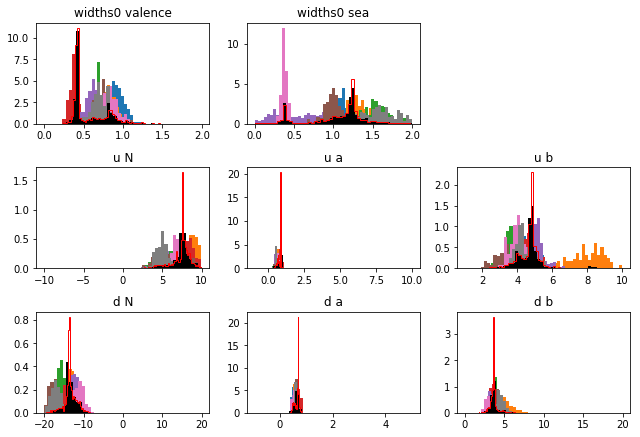

In [12]:
samples=MC['samples']
samples2=MC['samples2']
weights=MC['weights']
weights2=MC['weights2']
order=MC['order']
runs=MC['runs']

nrows,ncols=10,3
fig = py.figure(figsize=(ncols*3,nrows*2))

def get_idx(key,tag):
    for i in range(len(order)):
        if order[i][1]==key and order[i][2]==tag:
            return i

global cnt
cnt=0
def plot(tags):
    global cnt
    for i in range(1,len(tags)):
        cnt+=1
        if tags[i]==None: continue
        idx=get_idx(tags[0],tags[i])
        ax=py.subplot(nrows,ncols,cnt)
        vmin=np.amin(samples2.T[idx])
        vmax=np.amax(samples2.T[idx])
        R=None#(vmin,vmax)
        for k in runs:
            ax.hist(runs[k]['samples'].T[idx],weights=runs[k]['weights'],bins=50,normed=True,range=R)
        ax.hist(samples.T[idx],weights=weights,bins=50,color='k',normed=True,range=R)
        ax.hist(samples2.T[idx],weights=weights2,bins=50,color='r',histtype='step',normed=True,range=R)
        ax.set_title(tags[i])
        mean=np.einsum('i,i',samples2.T[idx],weights2)
        std=np.einsum('i,i',(samples2.T[idx]-mean)**2,weights2)**0.5
        print '%20s = %10.5f +/- %10.5f'%(tags[i],mean,std)
        #ax.set_xlim(vmin,vmax)
    py.tight_layout()

plot(['transversity','widths0 valence','widths0 sea',None])
plot(['transversity','u N','u a','u b'])
plot(['transversity','d N','d a','d b'])
#plot(['collins','widths0 pi+ fav','widths0 pi+ unfav',None])
#plot(['collins','pi+ u N 1','pi+ u a 1','pi+ u b 1'])
#plot(['collins','pi+ d N 1','pi+ d a 1','pi+ d b 1'])

## data vs theory

In [13]:
data={'weights':MC['weights2']}
cnt=0
for s in MC['samples2']:
    cnt+=1    
    lprint('%d/%d'%(cnt,len(MC['samples2'])))  
    conf['resman'].get_residuals(s);
    for k in conf['resman'].sidisres.tabs:
        if k  not in data: data[k]=[]
        thy=conf['resman'].sidisres.tabs[k]['thy']    
        norm=conf['datasets']['sidis']['norm'][k]['value']
        shift=conf['resman'].sidisres.tabs[k]['shift']        
        data[k].append(shift+thy/norm)
save(data,'%s/%s'%(path2results,'sidis.dat'))   

1702/1702

### compute averages and collect results

In [14]:
data=load('%s/%s'%(path2results,'sidis.dat'))   
for k in data: data[k]=np.array(data[k])
thy,dthy={},{}
for k in data:
    if k=='weights': continue
    thy[k]=np.einsum('i,ik->k',data['weights'],data[k])
    dthy[k]=np.einsum('i,ik->k',data['weights'],(data[k]-thy[k])**2)**0.5
for k in thy: 
    conf['resman'].sidisres.tabs[k]['thy']=copy.copy(thy[k])
    conf['resman'].sidisres.tabs[k]['dthy']=copy.copy(dthy[k])

In [15]:
report=conf['resman'].gen_report(verb=0,level=1)
delimiters=[]
for i in range(len(report)): 
    if 'reaction:' in report[i]: delimiters.append(i) 

data={}
nlines=len(report)
for i in range(len(delimiters)):
    ini=delimiters[i]
    if i==len(delimiters)-1: fin=len(report)
    else: fin=delimiters[i+1]
    reaction=report[ini].replace('reaction:','').strip()
    data[reaction]={'raw data':report[ini:fin]}
    
for k in data:
    print k
    block=data[k]['raw data']
    isep=[i for i in range(len(block)) if '--------' in block[i]][0]
    data[k]['summary']=[block[i] for i in range(isep)]
    data[k]['tables']=[block[i] for i in range(isep+1,len(block))]

    tabs={}
    for l in data[k]['tables']:
        info=l.split(',')
        col=[s for s in info if 'col' in s][0].split('=')[1].strip()
        if col not in tabs: tabs[col]={}
        info=[[ss.strip() for ss in s.split('=')] for s in info if 'col' not in info  if s.strip()!='']
        
        for s in info:
            if s[0] not in tabs[col]: tabs[col][s[0]]=[]
        
        for s in info:
            try:
                value=float(s[1])
            except:
                value=s[1]
            tabs[col][s[0]].append(value)        

    data[k]['tabs']=tabs
save(data,'%s/%s'%(path2results,'data_and_thy.dat'))  

sidis


In [16]:
def summary():
    for k in data:
        print ""
        for l in data[k]['summary']: print l
summary()


reaction: sidis
    idx        tar        had        col        obs  npts       chi2      rchi2      nchi2
   4000   deuteron        pi+    compass AUTcollins     6       5.50       0.00       0.00
   4001   deuteron        pi+    compass AUTcollins     6       6.07       0.00       0.00
   4002   deuteron        pi+    compass AUTcollins     6       4.87       0.00       0.00
   4003   deuteron        pi-    compass AUTcollins     6       7.13       0.00       0.00
   4004   deuteron        pi-    compass AUTcollins     6       7.96       0.00       0.00
   4005   deuteron        pi-    compass AUTcollins     6       3.89       0.00       0.00
   3016     proton        pi-     HERMES AUTcollins     5       9.70       0.00       0.00
   3018     proton        pi-     HERMES AUTcollins     6       3.97       0.00       0.00
   3010     proton        pi+    compass AUTcollins     6       5.64       0.00       0.00
   3025     proton        pi+    compass AUTcollins     7       7.33     

### plot data and theory

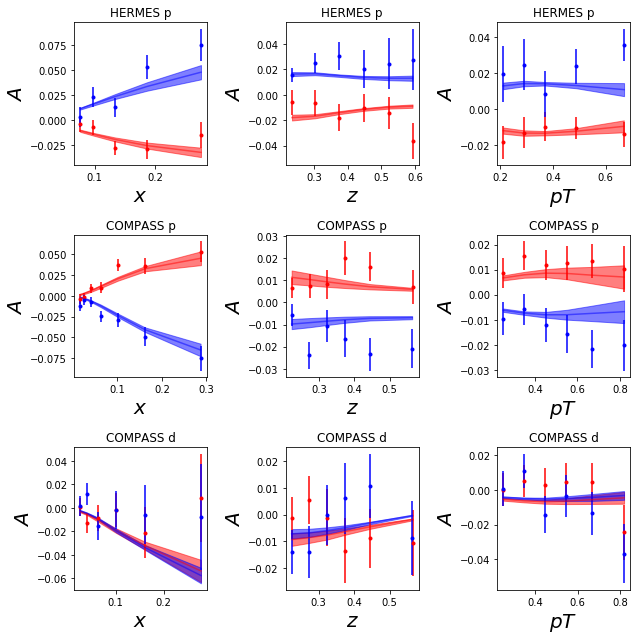

In [17]:
data=load('%s/%s'%(path2results,'data_and_thy.dat'))

nrows,ncols=3,3
fig = py.figure(figsize=(ncols*3,nrows*3))


tab=pd.DataFrame(data['sidis']['tabs']['HERMES']).query('tar=="proton"')
cnt=0
for dep in ['x','z','pT']:
    cnt+=1
    if dep=='pT': _dep='pt'
    else: _dep=dep
    ax=py.subplot(nrows,ncols,cnt)
    _tab=tab.query('dep=="%s"'%_dep)
    pip=_tab.query('had=="pi+"')
    pim=_tab.query('had=="pi-"')
    ax.errorbar(pip[dep],-pip['exp'],yerr=pip['alpha'],fmt='r.')
    ax.errorbar(pim[dep],-pim['exp'],yerr=pim['alpha'],fmt='b.')
    ax.plot(pip[dep],-pip['thy'],color='r',alpha=0.5)
    ax.plot(pim[dep],-pim['thy'],color='b',alpha=0.5)
    ax.fill_between(pip[dep],-(pip['thy']-pip['dthy']),-(pip['thy']+pip['dthy']),color='r',alpha=0.5)
    ax.fill_between(pim[dep],-(pim['thy']-pim['dthy']),-(pim['thy']+pim['dthy']),color='b',alpha=0.5)
    ax.set_xlabel(r'$%s$'%dep,size=20); ax.set_ylabel(r'$A$',size=20)
    ax.set_title('HERMES p')

    
tab=pd.DataFrame(data['sidis']['tabs']['compass']).query('tar=="proton"')
for dep in ['x','z','pT']:
    cnt+=1
    if dep=='pT': _dep='pt'
    else: _dep=dep
    ax=py.subplot(nrows,ncols,cnt)
    _tab=tab.query('dep=="%s"'%_dep)
    pip=_tab.query('had=="pi+"')
    pim=_tab.query('had=="pi-"')
    ax.errorbar(pip[dep],-pip['exp'],yerr=pip['alpha'],fmt='r.')
    ax.errorbar(pim[dep],-pim['exp'],yerr=pim['alpha'],fmt='b.')
    ax.plot(pip[dep],-pip['thy'],color='r',alpha=0.5)
    ax.plot(pim[dep],-pim['thy'],color='b',alpha=0.5)
    ax.fill_between(pip[dep],-(pip['thy']-pip['dthy']),-(pip['thy']+pip['dthy']),color='r',alpha=0.5)
    ax.fill_between(pim[dep],-(pim['thy']-pim['dthy']),-(pim['thy']+pim['dthy']),color='b',alpha=0.5)
    ax.set_xlabel(r'$%s$'%dep,size=20); ax.set_ylabel(r'$A$',size=20)
    ax.set_title('COMPASS p')

tab=pd.DataFrame(data['sidis']['tabs']['compass']).query('tar=="deuteron"')
for dep in ['x','z','pT']:
    cnt+=1
    if dep=='pT': _dep='pT'
    else: _dep=dep
    ax=py.subplot(nrows,ncols,cnt)
    _tab=tab.query('dep=="%s"'%_dep)
    pip=_tab.query('had=="pi+"')
    pim=_tab.query('had=="pi-"')
    ax.errorbar(pip[dep],-pip['exp'],yerr=pip['alpha'],fmt='r.')
    ax.errorbar(pim[dep],-pim['exp'],yerr=pim['alpha'],fmt='b.')
    ax.plot(pip[dep],-pip['thy'],color='r',alpha=0.5)
    ax.plot(pim[dep],-pim['thy'],color='b',alpha=0.5)
    ax.fill_between(pip[dep],-(pip['thy']-pip['dthy']),-(pip['thy']+pip['dthy']),color='r',alpha=0.5)
    ax.fill_between(pim[dep],-(pim['thy']-pim['dthy']),-(pim['thy']+pim['dthy']),color='b',alpha=0.5)
    ax.set_xlabel(r'$%s$'%dep,size=20); ax.set_ylabel(r'$A$',size=20)
    ax.set_title('COMPASS d')


py.tight_layout()

## PDFs and FFs

In [18]:
def calc(func):
    RAW=[]
    cnt=0
    for s in MC['samples2']:
        cnt+=1    
        lprint('%d/%d'%(cnt,len(MC['samples2'])))  
        conf['parman'].set_new_params(s);    
        RAW.append(func())
    RAW=np.array(RAW)
    f =np.einsum('k,kif->if',MC['weights2'],RAW)
    df=np.einsum('k,kif->if',MC['weights2'],(RAW-f)**2)**0.5
    f=np.einsum('if->fi',f)
    df=np.einsum('if->fi',df)
    return {'f':f,'df':df}

In [19]:
X1=10**np.linspace(-3,-1)
X2=np.linspace(0.101,0.999)
X=np.append(X1,X2)
h=calc(lambda : [conf['transversity'].get_C(x,1) for x in X])

1702/1702

In [20]:
Z1=10**np.linspace(-3,-1)
Z2=np.linspace(0.101,0.999)
Z=np.append(Z1,Z2)
Hpi=calc(lambda : [conf['collins'].get_C(z,1,'pi+') for z in Z])

1702/1702

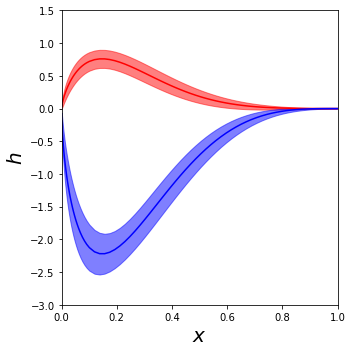

In [21]:
nrows,ncols=1,1
py.figure(figsize=(ncols*5,nrows*5))
ax=py.subplot(nrows,ncols,1)
ax.fill_between(X,(h['f'][1]-h['df'][1]),(h['f'][1]+h['df'][1]),color='r',alpha=0.5)
ax.plot(X,h['f'][1],'r')
ax.fill_between(X,(h['f'][3]-h['df'][3]),(h['f'][3]+h['df'][3]),color='b',alpha=0.5)
ax.plot(X,h['f'][3],'b')
ax.set_ylabel(r'$h$',size=20)
ax.set_xlabel(r'$x$',size=20)
ax.set_ylim(-3,1.5)
ax.set_xlim(0,1)

#ax=py.subplot(nrows,ncols,2)
#ax.fill_between(Z,Z*(Hpi['f'][1]-Hpi['df'][1]),Z*(Hpi['f'][1]+Hpi['df'][1]),color='r',alpha=0.5)
#ax.fill_between(Z,Z*(Hpi['f'][3]-Hpi['df'][3]),Z*(Hpi['f'][3]+Hpi['df'][3]),color='b',alpha=0.5)
#ax.plot(Z,Z*Hpi['f'][1],'r')
#ax.plot(Z,Z*Hpi['f'][3],'b')

#ax.set_ylabel(r'$H$',size=20)
#ax.set_xlabel(r'$x$',size=20)
#ax.set_ylim(-0.5,0.5)

py.tight_layout()